# Fig4. Disciplinary backgrounds of researchers working in Digital Humanities 

#### Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('seaborn-muted')

from collections import Counter

def read_csv(path):
    """
    :param path: of desir the xlsx file
    :return: String that contains all project descriptions
    """
    df = pd.read_csv(path)
    filtered_df = df.replace(np.nan, '-', regex=True)
    
    
    return filtered_df

#### Define researchers data path

In [2]:
file_path = "data/mapeo_investigadores.csv"

#### Define function to clean researchers data

In [3]:
def prepare_data(data, num_of_discp):
    mini = data[["Área de procedencia/disciplina","ID investigador"]]
    mini.columns = ["disciplina", "id"]

    filtered_df = mini.loc[mini["disciplina"].str.contains('\|')]
    mini = mini.loc[mini["disciplina"].str.contains('\|') != True]
    new_discp = []
    for row in filtered_df.itertuples():
        for disciplina in row.disciplina.split(" | "):
            new_discp.append([disciplina, row.id])
    fix_df = pd.DataFrame(new_discp, columns=["disciplina", "id"])
    mini = mini.append(fix_df)
    
    del_disciplinas = ["Arqueología", "Ciencias de la educación"]
    mini = mini[~mini['disciplina'].isin(del_disciplinas)]
    
    
    grouped = mini.groupby("disciplina")
    df2 = grouped.count().reset_index().sort_values(by=['id'], ascending=False)
    df2.columns = ["disciplina", "count"]
    return df2

#### Function to translate disciplinary backgrounds

In [4]:
def translate(dataframe, column_to_translate, translations_filename):    
    translations_df = read_csv(f"data/{translations_filename}.csv")
    translations_df.columns=["disciplina", "disciplinary_background"]
    df_def = pd.merge(dataframe, translations_df, on=column_to_translate, how='inner', validate="one_to_many")
    return df_def

#### Run program
## Change 'num_of_discp' to show as many disciplinary backgrounds as you want

In [5]:
num_of_discp = 17
investigadores = read_csv(file_path)
df2 = prepare_data(investigadores, num_of_discp)
# parameters: (dataframe, column_to_translate, translations_filename)
df2 = translate(df2, "disciplina", "disciplinas")

#### Print horizontal bar plot

<Figure size 432x288 with 0 Axes>

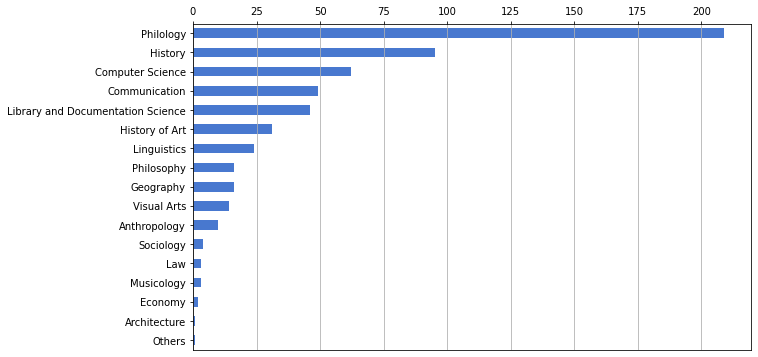

In [6]:
plt.figure()
ax = df2.head(num_of_discp).plot.barh(x='disciplinary_background', y='count', figsize=(10,6), legend=False)
ax.set_ylabel("")
ax.xaxis.tick_top() 
ax.invert_yaxis()
plt.grid(axis='x')
plt.show()

In [7]:
df2

,disciplina,count,disciplinary_background
0,Filología,209,Philology
1,Historia,95,History
2,Ciencias de la computación,62,Computer Science
3,Comunicación,49,Communication
4,Biblioteconomía y documentación,46,Library and Documentation Science
5,Historia del Arte,31,History of Art
6,Lingüística y lenguas,24,Linguistics
7,Filosofía,16,Philosophy
8,Geografía,16,Geography
9,Artes visuales,14,Visual Arts
